In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



In [2]:
beta <- readRDS("/gpfs/commons/groups/zhu_lab/nattada/data/BetaCellDifferentiationProject/Deep/newpipeline/Seurat/Subset_merged_beta.rds")
beta

An object of class Seurat 
50972 features across 248609 samples within 1 assay 
Active assay: RNA (50972 features, 10000 variable features)
 2 dimensional reductions calculated: pca, umap

In [3]:
beta[["percent.mt"]] <- PercentageFeatureSet(beta, pattern = "^MT-")

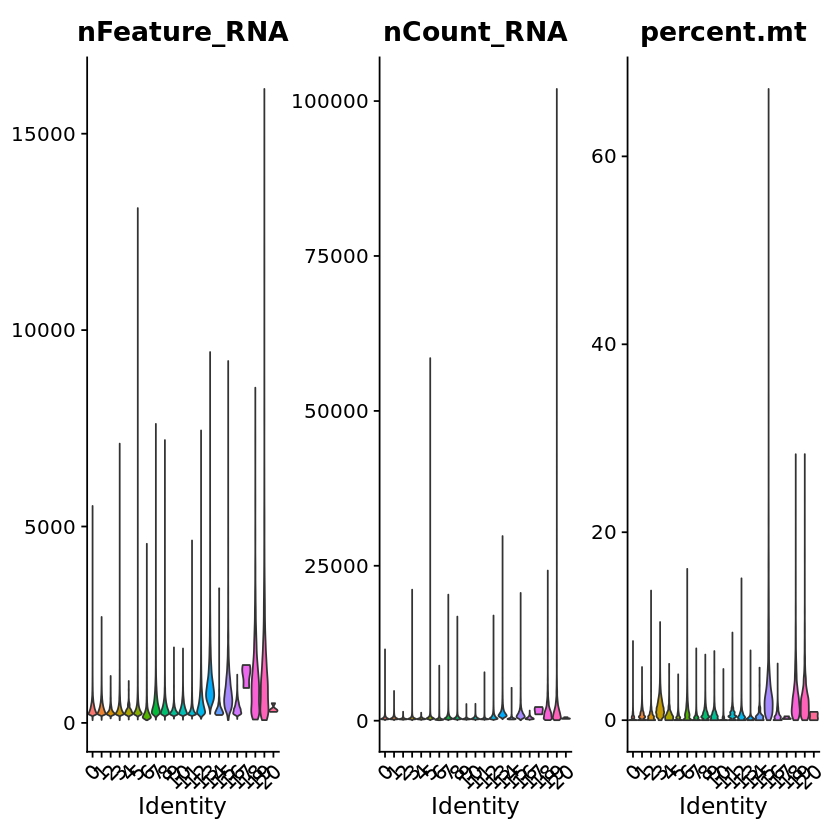

In [4]:
VlnPlot(beta,features = c("nFeature_RNA", "nCount_RNA","percent.mt"),ncol = 3,pt.size=0)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



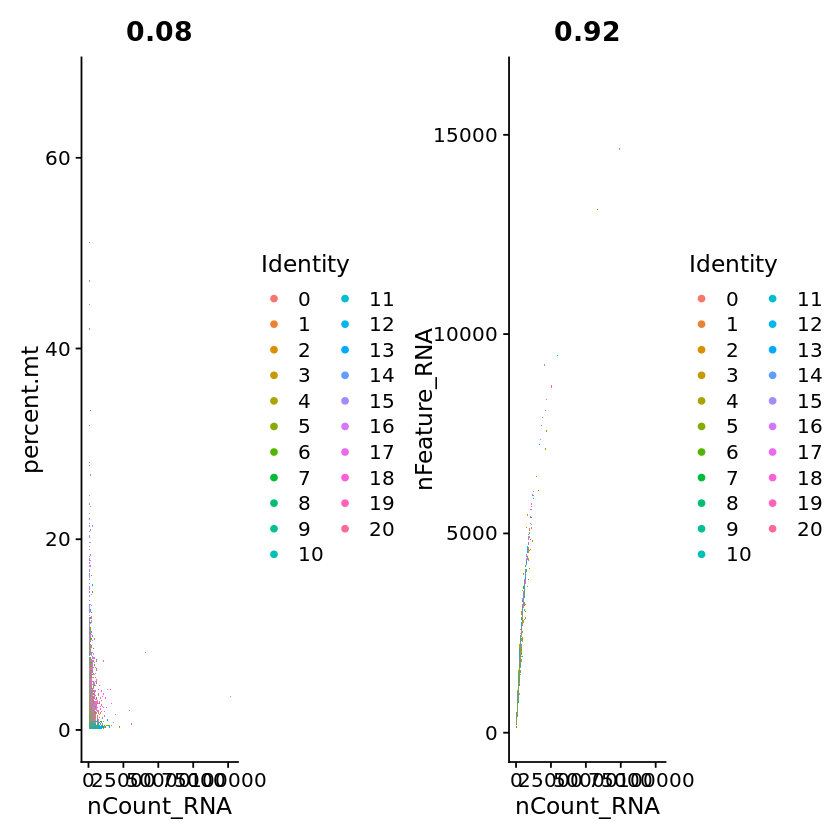

In [5]:
plot1 <- FeatureScatter(beta, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(beta, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

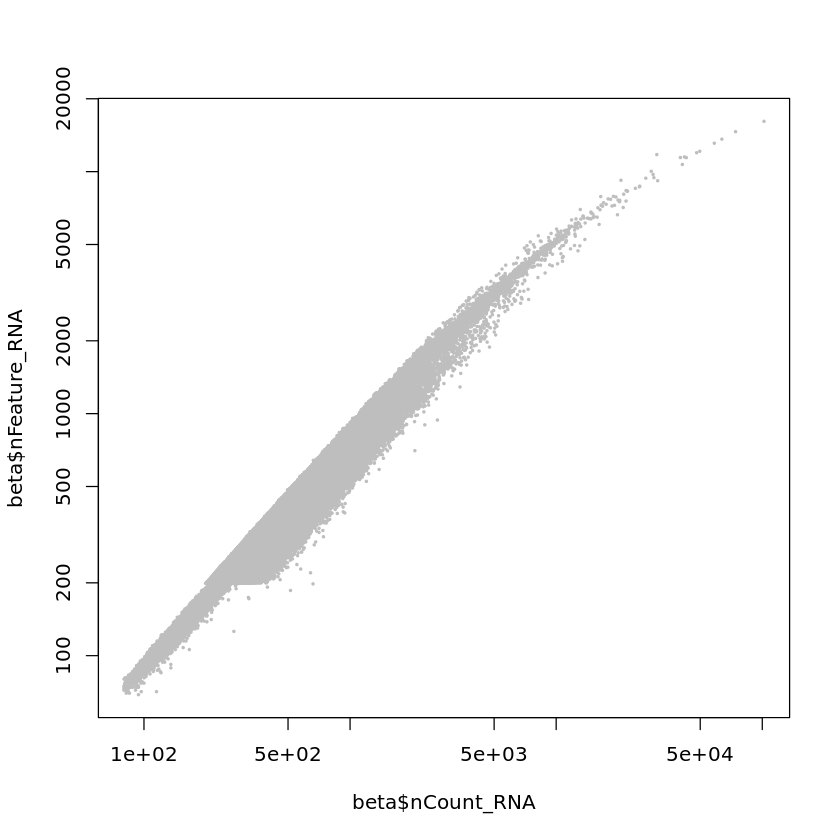

In [6]:
plot(beta$nCount_RNA, beta$nFeature_RNA, log="xy", pch=19, cex=0.25, col="grey")

In [7]:
beta <- NormalizeData(beta, normalization.method = "LogNormalize", scale.factor = 10000)
beta <- NormalizeData(beta)

In [8]:
beta <- FindVariableFeatures(beta, selection.method = "vst", nfeatures = 10000)

In [9]:
top10 <- head(VariableFeatures(beta), 10)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


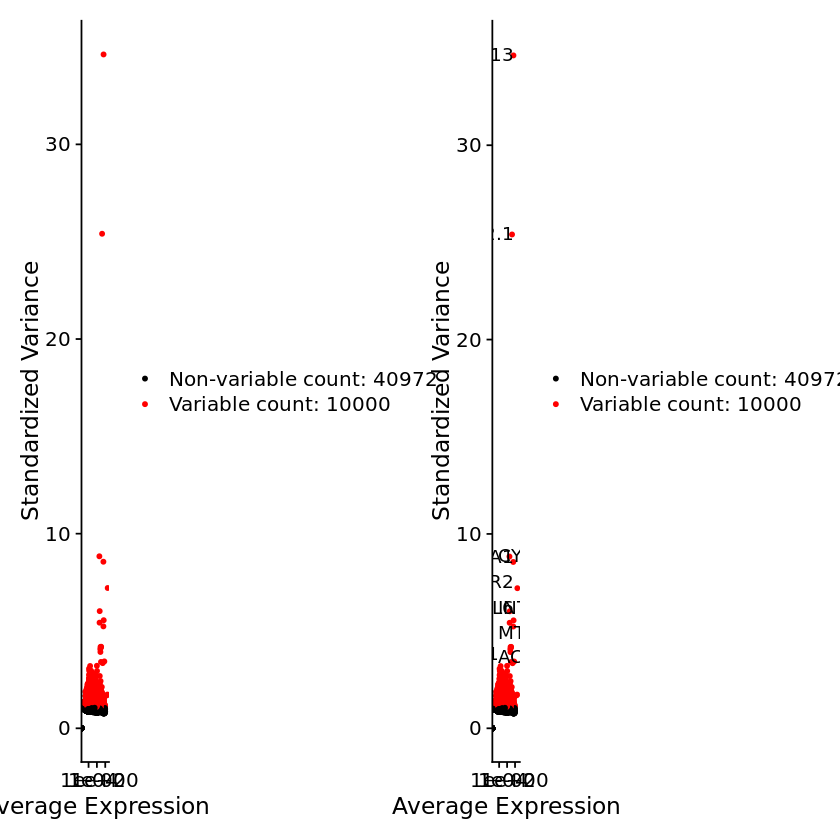

In [10]:
plot1 <- VariableFeaturePlot(beta)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2

Regressing out percent.mt

Centering and scaling data matrix

PC_ 1 
Positive:  ADARB2, TPH1, ABCC8, DACH2, BRINP3, GRIA4, SNTG1, COL5A2, DOCK10, AC109466.1 
	   RNF220, KCNK13, ARPP21, LMX1A, CCSER1, AC112770.1, CASR, LRFN2, AC024940.1, PCSK2 
	   AL354771.1, SLC18A1, LINC01014, SPOCK3, ERO1B, PLXNA2, AC091987.1, HCN1, PLD5, GALNT14 
Negative:  AC023282.1, CAPN13, MT-ATP8, AP001931.2, FOXP1, AL359736.1, PDE3A, ACSM3, AP001931.1, IGF2 
	   CYHR1, AL669831.3, NKTR, PCDHGA2, PCDHGB3, PCDHGB1, PCDHGB2, PCDHGA3, PCDHGA7, PCDHGA4 
	   PCDHGA1, PCDHGA5, SLC4A4, MAGI1, PCDHGB4, PRH1, KIAA1217, POLR2J3, PCDHGA6, FN1 
PC_ 2 
Positive:  FN1, SLC4A4, CASC15, LYPD6B, FLRT2, KIAA1217, FRAS1, EXT1, MAGI1, PDE3A 
	   NR5A2, NRG3, TANC1, AC083870.1, ACSM1, AC016766.1, ANKRD45, KCNH7, TCF7L2, RBPMS 
	   MECOM, MID1, AC004381.3, LAMA1, FBXL7, ERBB4, SVIL, CDH6, SERINC5, PARD3 
Negative:  ADARB2, PCDHGA2, PCDHGB3, PCDHGB2, PCDHGB1, PCDHGA3, PCDHGA7, PCDHGA1, PCDHGA5, PCDHGA4 
	   PCDHGB4, PCDHGA6, PCDHGA

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 248609
Number of edges: 5566165

Running Louvain algorithm with multilevel refinement...
Maximum modularity in 10 random starts: 0.8824
Number of communities: 40
Elapsed time: 110 seconds


15 singletons identified. 25 final clusters.



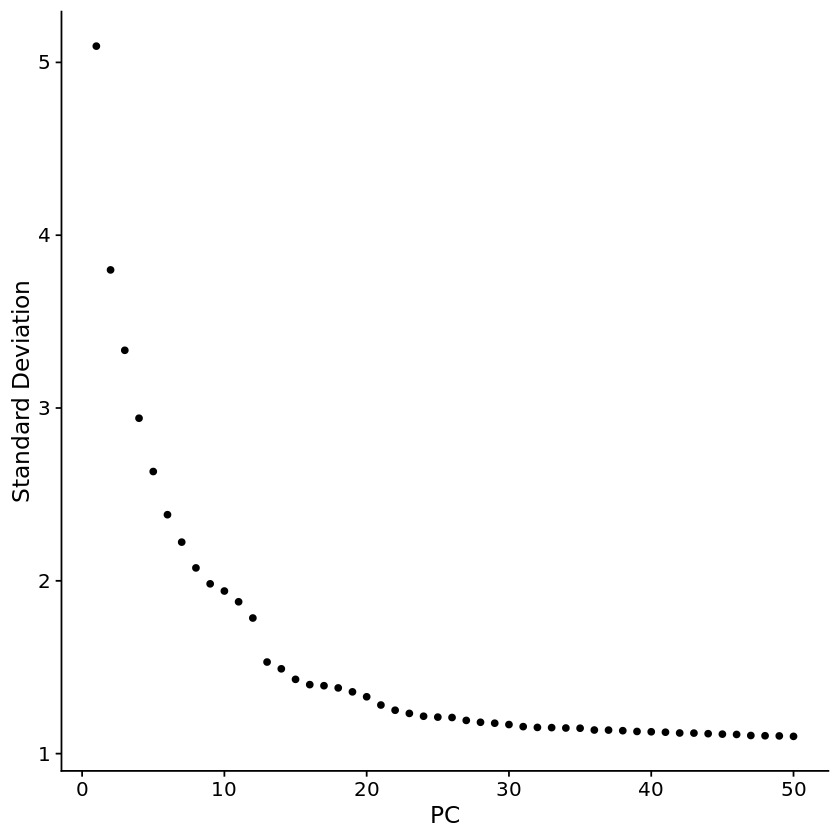

In [11]:
beta <- ScaleData(beta, vars.to.regress = "percent.mt")

beta <- RunPCA(beta, features = VariableFeatures(object = beta))
ElbowPlot(beta, ndims = 50)

k=25
pc.use<-1:20

beta <- FindNeighbors(beta,reduction="pca", dims=pc.use, k.param=k)
beta <- FindClusters(beta, resolution = 1.0, algorithm = 2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 248609
Number of edges: 5566165

Running Louvain algorithm with multilevel refinement...
Maximum modularity in 10 random starts: 0.9336
Number of communities: 28
Elapsed time: 120 seconds


15 singletons identified. 13 final clusters.

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:08:14 UMAP embedding parameters a = 1.896 b = 0.8006

13:08:14 Read 248609 rows and found 20 numeric columns

13:08:14 Using Annoy for neighbor search, n_neighbors = 25

13:08:14 Building Annoy index with metric = euclidean, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:08:32 Writing NN index file to temp file /scratch/RtmpF5Vkw2/fileaf57340ae32e

13:08:33 Searching Annoy index using 1 thread, search_k = 2500

13:09:59 Annoy recall = 100%

13:10:00 Commencing smooth kNN distanc

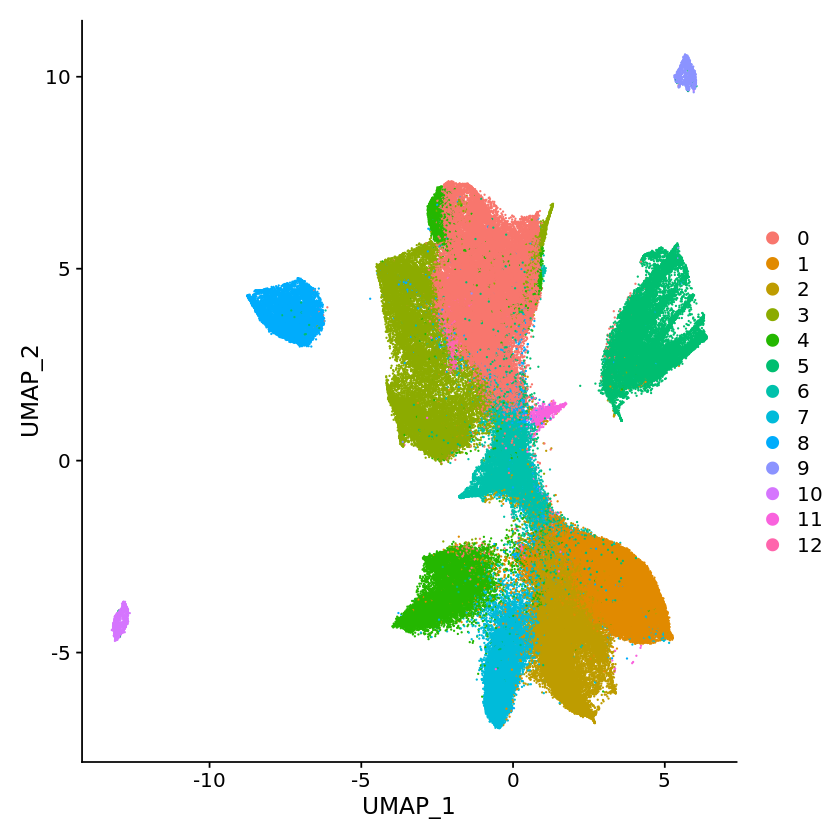

In [13]:
beta <- FindClusters(beta, resolution = 0.25, algorithm = 2)
beta <- RunUMAP(beta, dims = pc.use, metric = "euclidean", min.dist = 0.01,seed.use=131, umap.method = "uwot", n.neighbors = k, uwot.sgd=TRUE, verbose=TRUE)
DimPlot(beta, raster=FALSE, reduction = "umap")

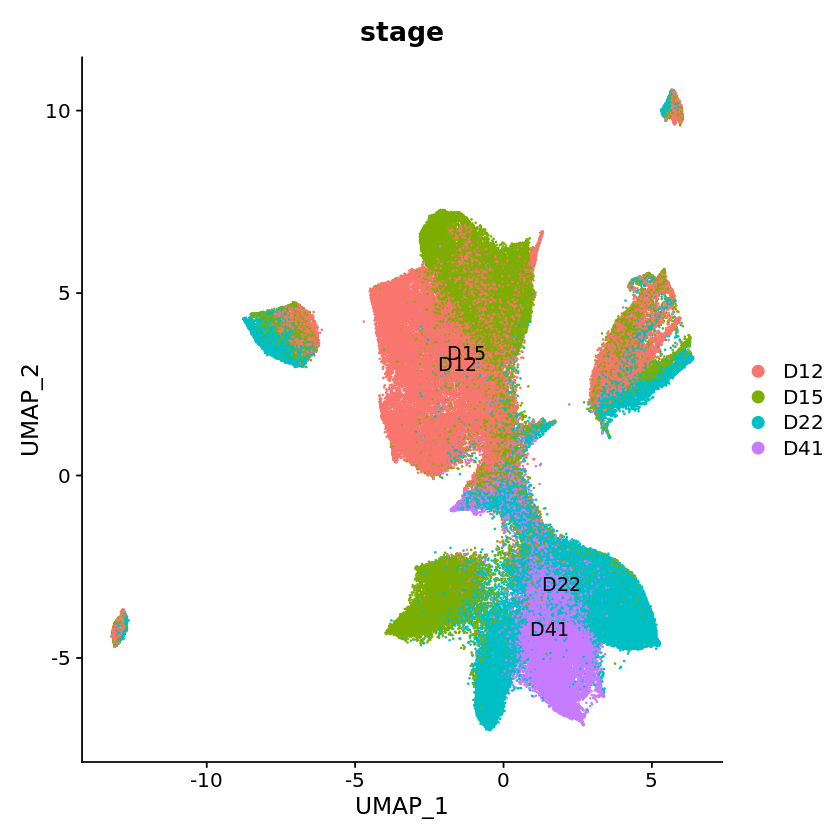

In [14]:
DimPlot(beta, pt.size=0.10, raster=FALSE, label=T, group.by = "stage", shuffle = T)

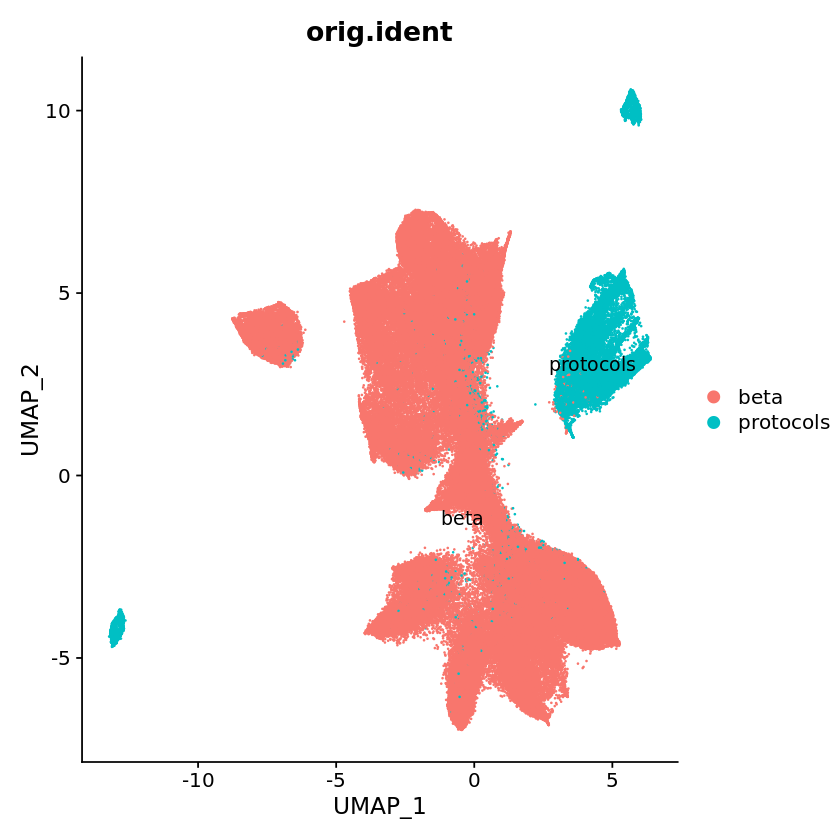

In [15]:
DimPlot(beta, pt.size=0.10, raster=FALSE, label=T, group.by = "orig.ident", shuffle = T)

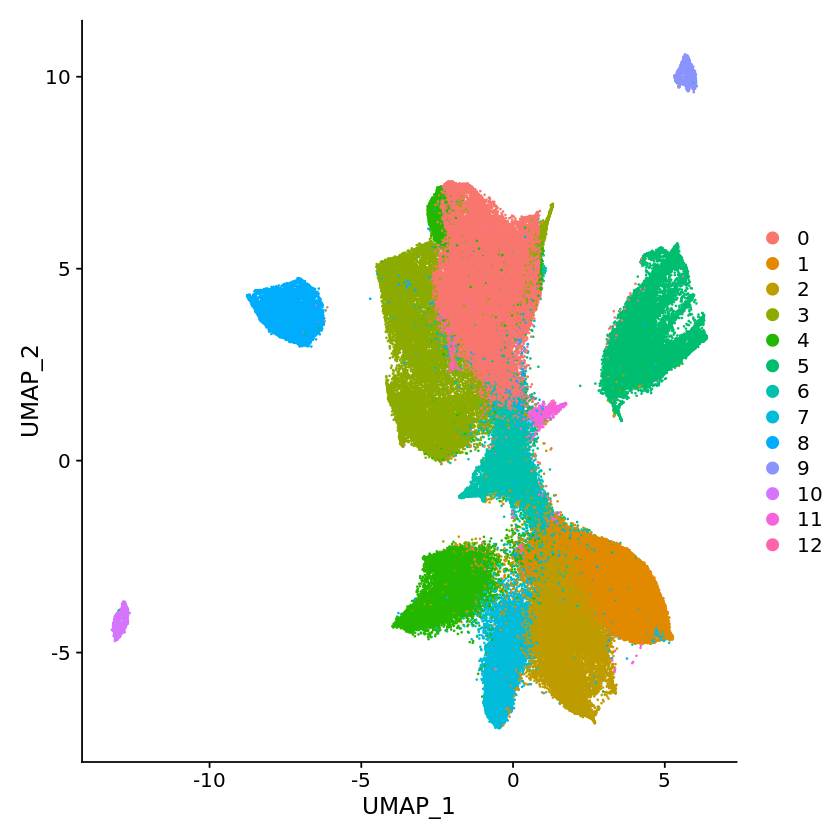

In [16]:
DimPlot(beta, pt.size=0.10, raster=FALSE, shuffle = T)

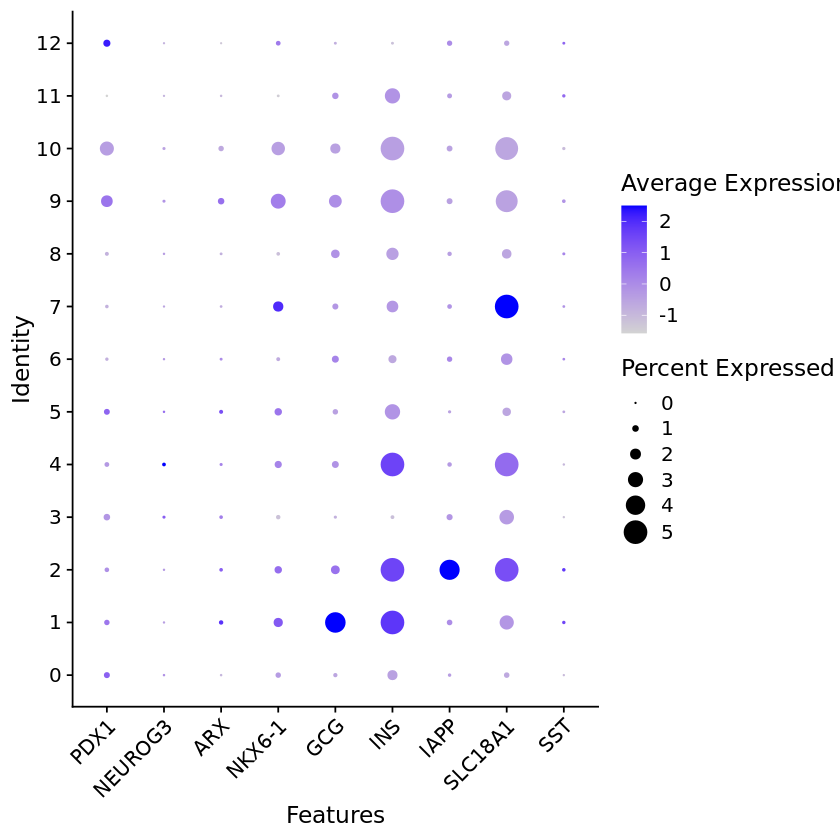

In [16]:
genes<-c("PDX1","NEUROG3","ARX","NKX6-1","GCG","INS","IAPP","SLC18A1","SST")
DotPlot(beta, features= genes, scale.max = 5) + RotatedAxis()

In [17]:
saveRDS(beta, "SubsetSeurat_merged_beta.rds")